En este proyecto vamos a ver cómo analizar un hashtag de Twitter. Aquí pongo transformaciones que se me han ocurrido, pero las posibilidades son infinitas.

In [133]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unidecode as ud

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

### Vista general del hashtag

Previamente hemos descargado los tweets del hashtag en un archivo .txt con un programa llamado [t-hoarder](https://github.com/congosto/t-hoarder_kit).

Guardamos el nombre del hashtag en una variable:

In [134]:
hashtag = 'felizmiercoles'

Abrimos el archivo .txt con pandas para tenerla en formato dataframe). Cada línea es un tweet. Imprimimos los tweets recogidos.

In [135]:
ht = pd.read_csv(f'../{hashtag}.txt', on_bad_lines="skip")
ht = ht.sort_values(by='date')
print('Hemos recolectado',len(ht),'tweets')
ht.head(2)

Hemos recolectado 10391 tweets


,id tweet,date,text,lang,app,author,id author,name,description,location,created at,author url,description urls,profile image url,followers,following,tweets,relation,user retweeted,tweet hashtags,tweet urls,media keys,id tweet retweeted,media types,media urls,retrieved at
10390,1592936250218254337,2022-11-16 17:42:52,12 #FelizMiercoles https://t.co/IS0uukmRJw,und,Twitter Web App,jramiroMX,296592711,CHILANGO,"Que nadie manipule tu criterio, ¿como puedes evitarlo?, solo adquiriendo el buen hábito de estar bien informado, no existe otra forma",CDMX,2011-05-11 02:05:17,None,None,https://pbs.twimg.com/profile_images/1311646474984476672/LjlH6TKT_normal.jpg,188000,209007,532514,tweet,None,['FelizMiercoles'],['https://twitter.com/jramiroMX/status/1592936250218254337/photo/1'],['3_1592936244039876608'],NaN,['photo'],['https://pbs.twimg.com/media/Fhs_Ev_XgAAVSlS.png'],2022-11-17 17:41:47
10389,1592936257507950592,2022-11-16 17:42:53,"🗣️📢🏷️|#DebatirYRenovar 😷#FelizMiércoles #TROPA #16Nov ☮️#VEЛEZUELA .. #TalDíaComoHoy 1969 se inaugura el #AeropuertoInternacionalDeLaChinita en #Maracaibo. Sup.: 1.335,10 ha Plataforma: 745.626,67 m² Pista 3.000 m de largo x 45 m ancho. Pista Secundaria 2500 m x 30 ancho. https://t.co/6tv9hfB6Gq",es,Twitter Web App,EGMorenoR,1565040658620026880,Esio Moreno,"... ""LA MÁXIMA EXPRESIÓN DE LA DEMOCRACIA ES EL #SOCIALISMO"" #GuerrillaComunicacional... Leales siempre, traidores nunca..",Mérida R.B. de Venezuela,2022-08-31 18:16:47,None,None,https://pbs.twimg.com/profile_images/1573043522562920452/bryaSkS7_normal.jpg,1260,2902,3231,tweet,None,"['DebatirYRenovar', 'FelizMiércoles', 'TROPA', '16Nov', 'VEЛEZUELA', 'TalDíaComoHoy', 'AeropuertoInternacionalDeLaChinita', 'Maracaibo']","['https://twitter.com/EGMorenoR/status/1592936257507950592/photo/1', 'https://twitter.com/EGMorenoR/status/1592936257507950592/photo/1', 'https://twitter.com/EGMorenoR/status/1592936257507950592/photo/1', 'https://twitter.com/EGMorenoR/status/1592936257507950592/photo/1']","['3_1592935019831595011', '3_1592935132046016513', '3_1592935294311010308', '3_1592935560615809025']",NaN,"['photo', 'photo', 'photo', 'photo']","['https://pbs.twimg.com/media/Fhs99fdXkAM1Zbf.png', 'https://pbs.twimg.com/media/Fhs-EBfXwAELvYi.png', 'https://pbs.twimg.com/media/Fhs-Nd-XEAQWRgV.png', 'https://pbs.twimg.com/media/Fhs-c-CX0AEKm28.png']",2022-11-17 17:41:47


En Gephi, en la pestaña "Data laboratory", podemos exportar la información de las comunidades en un archivo .csv. Extraemos las columnas 'Label' (equivalente a author) y 'modularity_class' (comunidades) para añadirlas a nuestro dataframe principal. También cambiamos la columna 'Label' a 'author' para poderlas añadir más adelante. Para estandarizar nuestros datos, convertimos las columnas 'author', 'text' y 'user retweeted' minúsculas. Finalmente, unimos la columna 'modularity class' al dataframe, usando la columna 'author' como referencia.

In [136]:
ht_modularity = pd.read_csv(f'{hashtag}_modularidad.csv')
ht_modularity = ht_modularity[['Label', 'modularity_class']]
ht_modularity.columns=['author', 'modularity_class']
ht_modularity['author'] = ht_modularity['author'].str.lower()
ht['author'] = ht['author'].str.lower()
ht['text'] = ht['text'].str.lower()
ht['user retweeted'] = ht['user retweeted'].str.lower()
ht = ht.merge(ht_modularity, how="left", on="author")
ht.head(2)

,id tweet,date,text,lang,app,author,id author,name,description,location,created at,author url,description urls,profile image url,followers,following,tweets,relation,user retweeted,tweet hashtags,tweet urls,media keys,id tweet retweeted,media types,media urls,retrieved at,modularity_class
0,1592936250218254337,2022-11-16 17:42:52,12 #felizmiercoles https://t.co/is0uukmrjw,und,Twitter Web App,jramiromx,296592711,CHILANGO,"Que nadie manipule tu criterio, ¿como puedes evitarlo?, solo adquiriendo el buen hábito de estar bien informado, no existe otra forma",CDMX,2011-05-11 02:05:17,None,None,https://pbs.twimg.com/profile_images/1311646474984476672/LjlH6TKT_normal.jpg,188000,209007,532514,tweet,none,['FelizMiercoles'],['https://twitter.com/jramiroMX/status/1592936250218254337/photo/1'],['3_1592936244039876608'],NaN,['photo'],['https://pbs.twimg.com/media/Fhs_Ev_XgAAVSlS.png'],2022-11-17 17:41:47,4.0
1,1592936257507950592,2022-11-16 17:42:53,"🗣️📢🏷️|#debatiryrenovar 😷#felizmiércoles #tropa #16nov ☮️#veлezuela .. #taldíacomohoy 1969 se inaugura el #aeropuertointernacionaldelachinita en #maracaibo. sup.: 1.335,10 ha plataforma: 745.626,67 m² pista 3.000 m de largo x 45 m ancho. pista secundaria 2500 m x 30 ancho. https://t.co/6tv9hfb6gq",es,Twitter Web App,egmorenor,1565040658620026880,Esio Moreno,"... ""LA MÁXIMA EXPRESIÓN DE LA DEMOCRACIA ES EL #SOCIALISMO"" #GuerrillaComunicacional... Leales siempre, traidores nunca..",Mérida R.B. de Venezuela,2022-08-31 18:16:47,None,None,https://pbs.twimg.com/profile_images/1573043522562920452/bryaSkS7_normal.jpg,1260,2902,3231,tweet,none,"['DebatirYRenovar', 'FelizMiércoles', 'TROPA', '16Nov', 'VEЛEZUELA', 'TalDíaComoHoy', 'AeropuertoInternacionalDeLaChinita', 'Maracaibo']","['https://twitter.com/EGMorenoR/status/1592936257507950592/photo/1', 'https://twitter.com/EGMorenoR/status/1592936257507950592/photo/1', 'https://twitter.com/EGMorenoR/status/1592936257507950592/photo/1', 'https://twitter.com/EGMorenoR/status/1592936257507950592/photo/1']","['3_1592935019831595011', '3_1592935132046016513', '3_1592935294311010308', '3_1592935560615809025']",NaN,"['photo', 'photo', 'photo', 'photo']","['https://pbs.twimg.com/media/Fhs99fdXkAM1Zbf.png', 'https://pbs.twimg.com/media/Fhs-EBfXwAELvYi.png', 'https://pbs.twimg.com/media/Fhs-Nd-XEAQWRgV.png', 'https://pbs.twimg.com/media/Fhs-c-CX0AEKm28.png']",2022-11-17 17:41:47,22.0


A partir de la columna 'date' creamos otra con solo la fecha y la hora, sin minutos ni segundos.

In [137]:
ht['date_calc'] = ht['date'].apply(lambda x: x.split(":")[0])
ht['date_calc'] = ht['date_calc'].apply(lambda x: x + ":00")

Con esa nueva columna construimos una tabla dinámica para calcular cuántos tweets de cada clase hay por hora.

In [138]:
tweets_hour = pd.pivot_table(ht,index= "date_calc",columns= "modularity_class",aggfunc= ["count"],values=['id tweet'])
tweets_hour = tweets_hour.fillna(0)
tweets_hour.to_csv('distribucion_por_horas.csv')

tweets_hour = pd.read_csv('distribucion_por_horas.csv')
tweets_hour.columns = tweets_hour.iloc[1]
tweets_hour = tweets_hour[3:]
tweets_hour.to_csv('distribucion_por_horas.csv')

tweets_hour = pd.read_csv('distribucion_por_horas.csv')
tweets_hour = tweets_hour.drop(['Unnamed: 0'], axis=1)
tweets_hour.rename(columns={'modularity_class':'hour'}, inplace=True)
tweets_hour.head()

,hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0
0,2022-11-16 17:00,175.0,13.0,0.0,1.0,14.0,1.0,7.0,2.0,11.0,0.0,8.0,4.0,4.0,2.0,0.0,1.0,0.0,5.0,5.0,2.0,1.0,7.0,28.0,0.0,0.0,2.0
1,2022-11-16 18:00,535.0,29.0,3.0,7.0,22.0,6.0,17.0,4.0,5.0,4.0,35.0,9.0,9.0,7.0,2.0,0.0,0.0,11.0,16.0,21.0,12.0,27.0,132.0,4.0,32.0,9.0
2,2022-11-16 19:00,561.0,31.0,4.0,14.0,7.0,6.0,19.0,2.0,2.0,3.0,28.0,2.0,19.0,11.0,2.0,1.0,0.0,15.0,11.0,20.0,12.0,11.0,149.0,4.0,35.0,12.0
3,2022-11-16 20:00,540.0,29.0,7.0,6.0,9.0,5.0,22.0,3.0,2.0,2.0,22.0,6.0,7.0,11.0,0.0,1.0,0.0,8.0,13.0,22.0,4.0,6.0,81.0,0.0,34.0,16.0
4,2022-11-16 21:00,493.0,31.0,7.0,3.0,4.0,5.0,8.0,2.0,1.0,3.0,9.0,6.0,10.0,9.0,0.0,0.0,0.0,3.0,9.0,34.0,5.0,2.0,41.0,4.0,61.0,9.0


Representamos el número de tweets por hora en un gráfico de barras acumuladas para identificar diferentes picos de actividad y la importancia de las diferentes comunidades. 

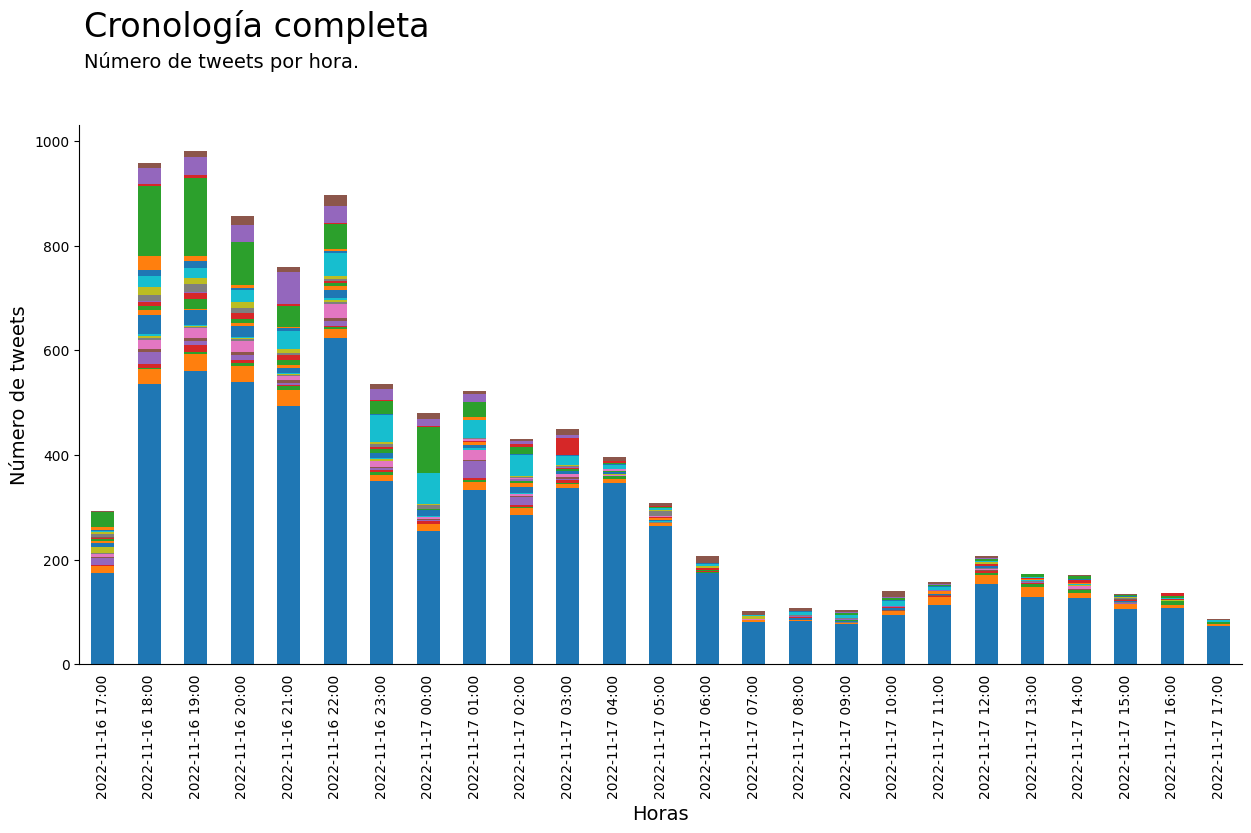

In [139]:
ax = tweets_hour.plot.bar(x='hour', stacked=True,figsize=(15,7),legend=None)
ax.spines[['top','right']].set_visible(False)
plt.text(-0.4,1200,'Cronología completa',fontsize=24)
plt.text(-0.4,1140,'Número de tweets por hora.',fontsize=14)
plt.xlabel('Horas',fontsize=14)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=True)
plt.ylabel('Número de tweets',fontsize=14)
plt.savefig('1. cronologia completa.jpg',bbox_inches='tight',dpi=50)

Podemos filtrar por fecha y quedarnos solo con el martes 6.

In [140]:
viz_peak = tweets_hour[(tweets_hour['hour'] > "2022-11-16 00:00")&(tweets_hour['hour'] < "2022-11-17 00:00")]
viz_peak.head(5)

,hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0
0,2022-11-16 17:00,175.0,13.0,0.0,1.0,14.0,1.0,7.0,2.0,11.0,0.0,8.0,4.0,4.0,2.0,0.0,1.0,0.0,5.0,5.0,2.0,1.0,7.0,28.0,0.0,0.0,2.0
1,2022-11-16 18:00,535.0,29.0,3.0,7.0,22.0,6.0,17.0,4.0,5.0,4.0,35.0,9.0,9.0,7.0,2.0,0.0,0.0,11.0,16.0,21.0,12.0,27.0,132.0,4.0,32.0,9.0
2,2022-11-16 19:00,561.0,31.0,4.0,14.0,7.0,6.0,19.0,2.0,2.0,3.0,28.0,2.0,19.0,11.0,2.0,1.0,0.0,15.0,11.0,20.0,12.0,11.0,149.0,4.0,35.0,12.0
3,2022-11-16 20:00,540.0,29.0,7.0,6.0,9.0,5.0,22.0,3.0,2.0,2.0,22.0,6.0,7.0,11.0,0.0,1.0,0.0,8.0,13.0,22.0,4.0,6.0,81.0,0.0,34.0,16.0
4,2022-11-16 21:00,493.0,31.0,7.0,3.0,4.0,5.0,8.0,2.0,1.0,3.0,9.0,6.0,10.0,9.0,0.0,0.0,0.0,3.0,9.0,34.0,5.0,2.0,41.0,4.0,61.0,9.0


Podemos quitar comunidades y renombrar las columnas para crear un gráfico de barras con leyenda.

In [141]:
viz_peak = viz_peak.drop(['4.0','5.0','6.0'], axis=1)
viz_peak = viz_peak.rename(columns={'0.0': 'comunidad_x', '1.0': 'comunidad_y'})

In [142]:
viz_peak.head()

,hour,comunidad_x,comunidad_y,2.0,3.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0
0,2022-11-16 17:00,175.0,13.0,0.0,1.0,2.0,11.0,0.0,8.0,4.0,4.0,2.0,0.0,1.0,0.0,5.0,5.0,2.0,1.0,7.0,28.0,0.0,0.0,2.0
1,2022-11-16 18:00,535.0,29.0,3.0,7.0,4.0,5.0,4.0,35.0,9.0,9.0,7.0,2.0,0.0,0.0,11.0,16.0,21.0,12.0,27.0,132.0,4.0,32.0,9.0
2,2022-11-16 19:00,561.0,31.0,4.0,14.0,2.0,2.0,3.0,28.0,2.0,19.0,11.0,2.0,1.0,0.0,15.0,11.0,20.0,12.0,11.0,149.0,4.0,35.0,12.0
3,2022-11-16 20:00,540.0,29.0,7.0,6.0,3.0,2.0,2.0,22.0,6.0,7.0,11.0,0.0,1.0,0.0,8.0,13.0,22.0,4.0,6.0,81.0,0.0,34.0,16.0
4,2022-11-16 21:00,493.0,31.0,7.0,3.0,2.0,1.0,3.0,9.0,6.0,10.0,9.0,0.0,0.0,0.0,3.0,9.0,34.0,5.0,2.0,41.0,4.0,61.0,9.0


Representamos el pico. La leyenda es muy grande porque hay muchas comunidades, pero se podría ocultar. Las líneas que empiezan con # no se ejecutan.

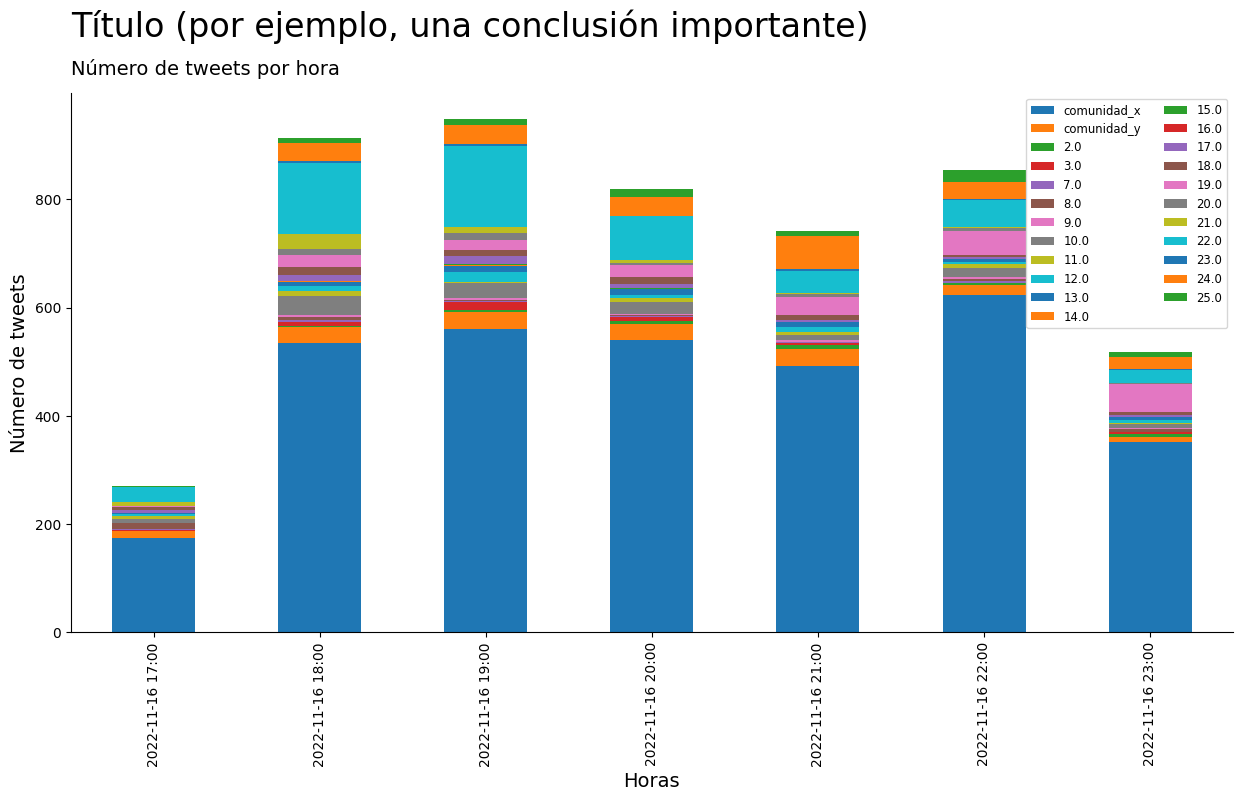

In [143]:
ax = viz_peak.plot.bar(x='hour', stacked=True,figsize=(15,7))
ax.spines[['top','right']].set_visible(False)
plt.xticks(rotation=90,ha='center')
plt.legend(loc='upper right', ncol=2, fontsize = 'small')
#plt.text tiene coordenadas x e y. Según el tamaño del gráfico habrá que cambiarlas para situar bien el título y el subtítulo.
plt.text(-0.5,1100,'Título (por ejemplo, una conclusión importante)',fontsize=24)
plt.text(-0.5,1030,'Número de tweets por hora',fontsize=14)
plt.xlabel('Horas', fontsize=14)
plt.tick_params(axis='x',which='both',bottom=True,top=False,labelbottom=True)
plt.ylabel('Número de tweets',fontsize=14)
plt.savefig('2. pico por horas.jpg',bbox_inches='tight',dpi=50)

Esta vez transformamos el tiempo en fecha, horas y minutos.

In [144]:
ht_minutes = ht
ht_minutes['date_calc'] = ht_minutes['date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
ht_minutes['date_calc'] = ht_minutes['date_calc'].apply(lambda x:x.strftime('%Y-%m-%d %H:%M'))

Creamos otra tabla dinámica de la misma forma.

In [145]:
tweets_minutes = pd.pivot_table(ht_minutes,index= "date_calc",columns= "modularity_class",aggfunc= ["count"],values=['id tweet'])
tweets_minutes = tweets_minutes.fillna(0)
tweets_minutes.to_csv('distribucion_por_minutos.csv')

tweets_minutes = pd.read_csv('distribucion_por_minutos.csv')
tweets_minutes.columns = tweets_minutes.iloc[1]
tweets_minutes = tweets_minutes[3:]
tweets_minutes.to_csv('distribucion_por_minutos.csv')

tweets_minutes = pd.read_csv('distribucion_por_minutos.csv')
tweets_minutes = tweets_minutes.drop(['Unnamed: 0'], axis=1)
tweets_minutes.rename(columns={'modularity_class':'minute'}, inplace=True)
tweets_minutes.head()

,minute,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0
0,2022-11-16 17:42,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2022-11-16 17:43,6.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0
2,2022-11-16 17:44,13.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2022-11-16 17:45,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0
4,2022-11-16 17:46,5.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Hacemos zoom a una hora cualquiera.

In [146]:
start_hashtag = tweets_minutes[(tweets_minutes['minute'] > "2022-11-16 18:00")&(tweets_minutes['minute'] < "2022-11-16 19:00")]

Descartamos las mismas clases y aplicamos los mismos nombres a las columnas como hicimos previamente, aunque podríamos cambiarlo a nuestro gusto en cada paso.

In [147]:
# start_hashtag = start_hashtag.drop(['4.0','5.0','6.0'], axis=1)
# start_hashtag = start_hashtag.rename(columns={'0.0': 'comunidad_x', '1.0': 'comunidad_y'})

Representamos de nuevo.

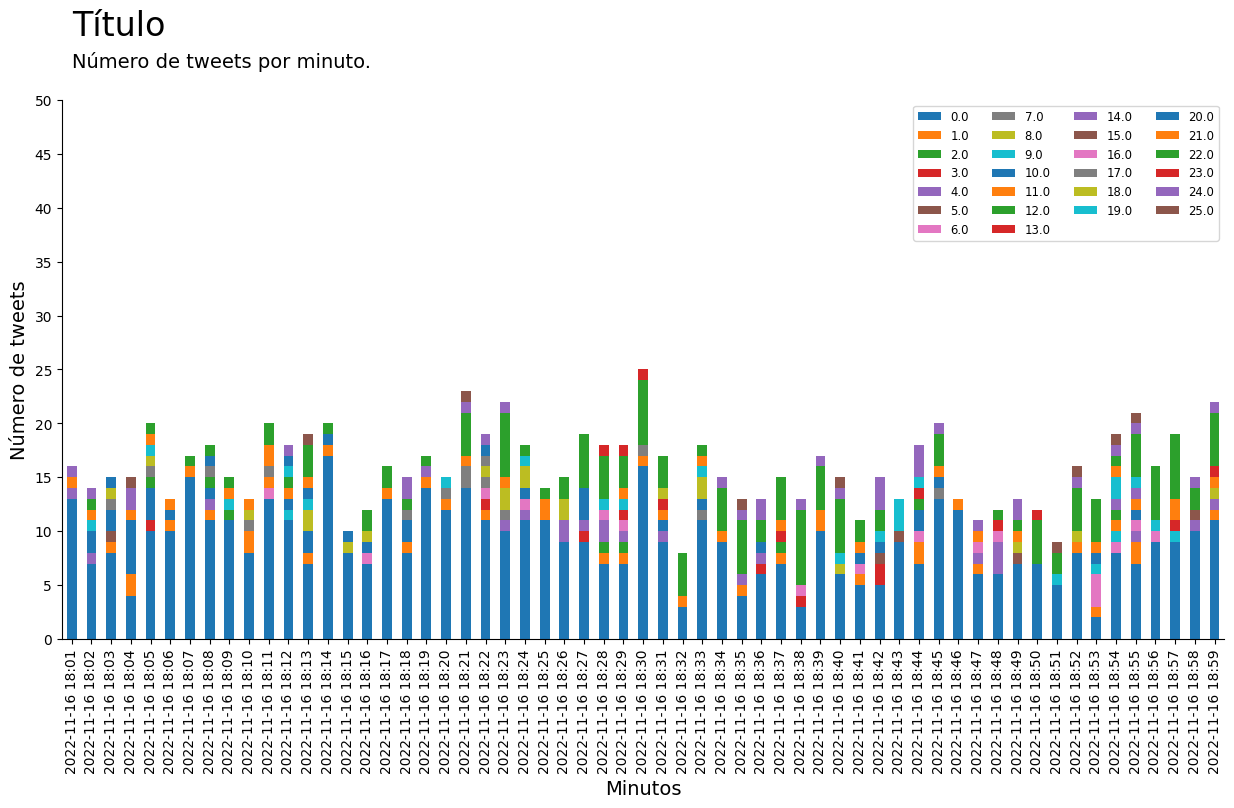

In [148]:
ax = start_hashtag.plot.bar(x='minute', stacked=True, figsize=(15,7))
ax.spines[['top','right']].set_visible(False)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,55,5.0))
plt.text(0,56,'Título',fontsize=24)
plt.text(0,53,'Número de tweets por minuto.',fontsize=14)
plt.legend(loc='upper right', ncol=4, fontsize = 'small')
plt.xlabel('Minutos',fontsize=14)
plt.ylabel('Número de tweets',fontsize=14)
plt.savefig('3. pico por minutos.jpg',bbox_inches='tight',dpi=100)

### Primeros 5 tweets

Si tuvieramos un inicio claro de actividad, por ejemplo si fuera un hashtag programado, podríamos ver los primeros 5 tweets recogidos de esta manera. Imaginemos que la actividad explota a las 14:00h.

In [149]:
primeros_5_tweets = ht[ht['date'] > '2022-11-14 06:00'].head()
primeros_5_tweets[['id tweet','date','author','text']]

,id tweet,date,author,text
0,1592936250218254337,2022-11-16 17:42:52,jramiromx,12 #felizmiercoles https://t.co/is0uukmrjw
1,1592936257507950592,2022-11-16 17:42:53,egmorenor,"🗣️📢🏷️|#debatiryrenovar 😷#felizmiércoles #tropa #16nov ☮️#veлezuela .. #taldíacomohoy 1969 se inaugura el #aeropuertointernacionaldelachinita en #maracaibo. sup.: 1.335,10 ha plataforma: 745.626,67 m² pista 3.000 m de largo x 45 m ancho. pista secundaria 2500 m x 30 ancho. https://t.co/6tv9hfb6gq"
2,1592936268081819649,2022-11-16 17:42:56,mpineda1970,rt @filosofo777usa: al descubierto los pactos secretos entre maduro y petro. #venezuela #noticiassin #pactodecorruptos #felizmiercoles #venezuelaendesobediencia https://t.co/dwphvcgtnf
3,1592936291507007488,2022-11-16 17:43:01,jramiromx,12 #felizmiercoles https://t.co/n8ho0ab1ua
4,1592936320703561728,2022-11-16 17:43:08,capegreco,"rt @s_msonia: ""la verdadera amistad es como la fosforescencia, resplandece mejor cuando todo se ha oscurecido."" ~rabindranath tagore 🧘‍♂️🌿🧘‍♀️ #tagore #amistad #felizmiercoles #buenosdiasatodos https://t.co/ozo4ngvb5j"


Nos podríamos con ciertas comunidades. Esta línea de código sirve para filtrar aquellas líneas cuya modularidad coincida con los valores que queremos. Como tiene # delante no se va a ejecutar.

In [150]:
#ht = ht[ht['modularity_class'].isin([6.0,7.0,9.0,5.0])].reset_index(inplace=False)
#ht = ht.drop(['index'], axis=1)

También podemos filtrar el dataframe original por fecha.

In [151]:
ht_pico = ht[(ht['date'] > "2022-11-16 00:00")&(ht['date'] < "2022-11-17 00:00")]

In [152]:
print('El pico tiene',len(ht_pico),'tweets')

El pico tiene 5909 tweets


### Número de usuarios 

In [153]:
print(len(ht_pico['author'].unique()),'usuarios fueron responsables del pico.')

3694 usuarios fueron responsables del pico.


### A quién se menciona más

Vamos a obtener las menciones. Creamos una función que busque en la columna 'text' las palabras que empiezan por @.

In [154]:
def extraer_mentions(row):
    texto = row['text']
    mentions = re.findall(r"@(\w+)", texto)
    findall_mentions.append(mentions)

Aplicamos la función y obtenemos una lista de lista. Aplicamos un loop para separar los hashtags de uno en uno, quitar las tildes y poner en minúsculas los hashtags.

In [155]:
findall_mentions = []

ht_pico.apply(extraer_mentions,axis=1)
lista_mentions = []
for lista in findall_mentions:
    for mention in lista:
        mention = ud.unidecode(mention)
        mention = mention.lower()
        lista_mentions.append(mention)


Convertimos la lista de hashtags a dataframe.

In [156]:
lista_mentions_series = pd.Series(lista_mentions)
mentions_count = lista_mentions_series.value_counts().head(20)
mentions_count = mentions_count.reset_index()
mentions_count.columns = ['user','mentions']
mentions_count.head()

,user,mentions
0,traselvalle_obc,489
1,jjaranaz94,486
2,egmorenor,315
3,inameh,277
4,avefenixbella,240


Contamos los retweets recibidos para limpiar los datos ya que para twitter un retweet se traduce como "rt @" y también se contabiliza como mención. Después los restaremos al número de menciones

In [157]:
rts = ht_pico['user retweeted'].value_counts()

Pasamos la serie a DataFrame.

In [158]:
rts = rts.to_frame().reset_index()
rts.columns = ['user','rts_received']

In [159]:
rts['user'] = rts['user'].apply(lambda x:x.replace('@',''))

Juntamos las menciones y los retweets recibidos asegurándonos que cada número de menciones corresponde a su usuario.

In [160]:
mentions_merged = mentions_count.merge(rts,how='left',on='user')

A los que no tenga retweets porque no han participado en el hashtag o no han recibido ninguno les ponemos un 0.

In [161]:
mentions_merged['rts_received'] = mentions_merged['rts_received'].fillna(0)

Restamos los retweets recibidos a las menciones.

In [162]:
mentions_merged['mentions'] = mentions_merged['mentions'] - mentions_merged['rts_received']

Representamos el top 5 con un gráfico de barras horizontales. Este gráfico de barras nos indica que ha habido mucho spam hacia ciertas cuentas.

A partir de esta parte lo más complicado va a ser entender las coordenadas. Según los valores de cada gráfico serán unas u otras.

Ejemplo: plt.txt(0,22) <- estas son las coordenadas x(0) e y(22). Quiere decir que el texto se colocará en el cero del eje y y en el 22 del eje x. Elijo 22 porque al haber 20 barras la posición de título queda bien en la 22, ya que tiene que ser más alto.

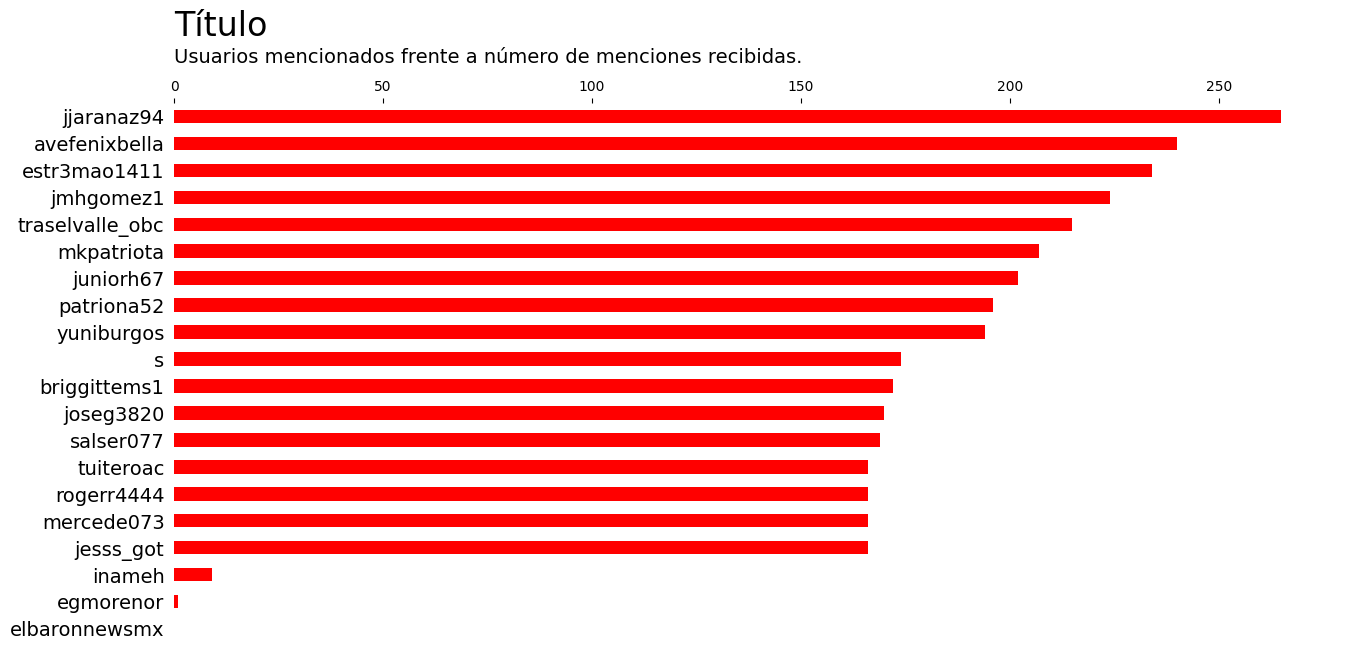

In [163]:
mentions = mentions_merged.sort_values(by='mentions',ascending=True).tail(20)

ax = mentions.plot.barh(x='user',y='mentions',figsize=(15,7),color='red',label='',legend=None,fontsize=14)
ax.spines[['top','bottom','left','right']].set_visible(False)
plt.tick_params(axis='x',which='both',bottom=False,top=True,labelbottom=False,labeltop=True)
plt.tick_params(axis='y',which='both',left=False,right=False)
plt.xlabel('',fontsize=14)
plt.ylabel('')
plt.text(0,22,'Título',fontsize=24)
plt.text(0,21,'Usuarios mencionados frente a número de menciones recibidas.',fontsize=14)
plt.savefig(f'{hashtag}_menciones.jpg',bbox_inches='tight',dpi=50)

### Hashtags secundarios más usados

Repetimos el mismo proceso de obtención con los hashtags.

In [164]:
def extraer_hashtags(row):
    texto = row['text']
    hashtags = re.findall(r"#(\w+)", texto)
    findall_hashtags.append(hashtags)

In [165]:
findall_hashtags = []

ht_pico.apply(extraer_hashtags,axis=1)

None #para que no salga ningún resultado en la celda

In [166]:
lista_hashtags = []
for lista in findall_hashtags:
    for hashtag in lista:
        hashtag = ud.unidecode(hashtag)
        hashtag = hashtag.lower()
        lista_hashtags.append(hashtag)

In [167]:
lista_hashtags_series = pd.Series(lista_hashtags)

In [168]:
hashtag_count = lista_hashtags_series.value_counts().head(20)
hashtag_count = hashtag_count.reset_index()
hashtag_count.columns = ['hashtag','count']

Quitamos el primero porque es el hashtag de estudio, queremos visualizar los secundarios.

In [169]:
ht_secundarios = hashtag_count.drop(0)

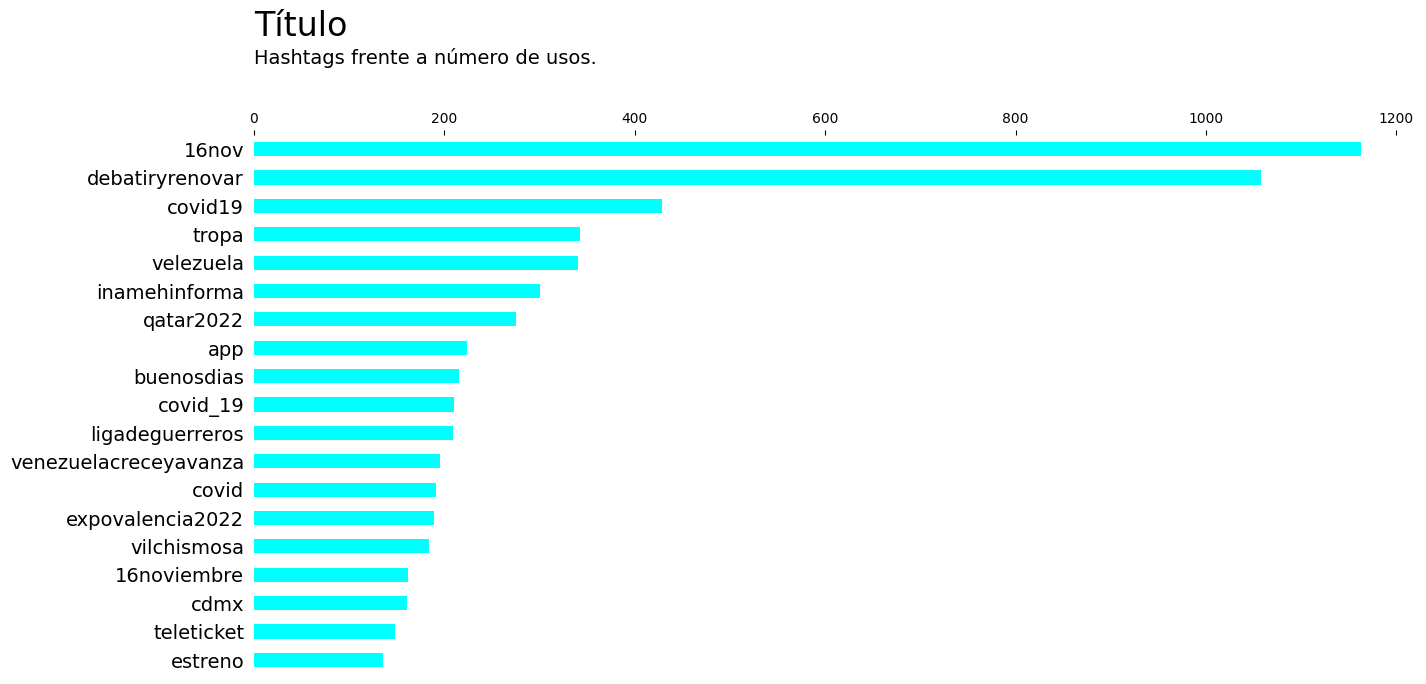

In [170]:
ht_secundarios = ht_secundarios.sort_values(by='count',ascending=True)
ax = ht_secundarios.plot.barh(x='hashtag',y='count',figsize=(15,7),color='cyan',label='',legend=None,fontsize=14)
ax.spines[['top','bottom','left','right']].set_visible(False)
plt.tick_params(axis='x',which='both',bottom=False,top=True,labelbottom=False,labeltop=True)
plt.tick_params(axis='y',which='both',left=False,right=False)
plt.xlabel('',fontsize=14)
plt.ylabel('')
plt.text(0,22,'Título',fontsize=24)
plt.text(0,21,'Hashtags frente a número de usos.',fontsize=14)
plt.savefig(f'{hashtag}_hashtags secundarios.jpg',bbox_inches='tight',dpi=50)

### Tweets más retweeteados

Contamos los tweets más retweeteados y los guardamos como dataframe para hacerlos más fáciles de leer.

In [171]:
mas_retweeteados = ht_pico['text'].value_counts().to_frame().reset_index()
mas_retweeteados.columns = ['text','count']
mas_retweeteados

,text,count
0,rt @motivos14185270: buenos días! ☀️ #felizmiercoles https://t.co/du73ql2fmg,128
1,"rt @elbaronnewsmx: 📢 la chatarra del metro #cdmx echando humo, o sin luz, mientras shitbaum @claudiashein de campaña, así la transformación de la 4t🤷🏻‍♂️ por eso votaron chav@s! regresé con cuenta nueva, verifica que nos seguimos 👍🏻 #ligadeguerreros aifa #vilchismosa #felizmiercoles https://t.co/iqic9s8c5y",104
2,rt @egmorenor: 🗣️📢🏷️|#debatiryrenovar 😷#felizmiércoles #tropa #16nov ☮️#veлezuela .. @juniorh67 @salser077 @jesss_got @mkpatriota @tuiteroac @avefenixbella @yuniburgos @joseg3820 @rogerr4444 @mercede073 @briggittems1 @estr3mao1411 @patriona52 @solecito19011 @jmhgomez1 #buenastardes https://t.co/atdjdti9is,102
3,rt @inameh: #16nov #inamehinforma precipitaciones totales estimadas #felizmiércoles https://t.co/bdy8yvk8rw,73
4,"rt @elbaronnewsmx: 📢 ya estan listos los solovinos cómo los llama su entrenador, para #lamarchadedonpendejo ? 🤣🤣🤣🤣 regresé con cuenta nueva, verifica que nos seguimos 👍🏻 #ligadeguerreros #felizmiercoles #amloestadesesperado #vilchismosa acarreados https://t.co/ocp42v39h0",73
...,...,...
2677,rt @totoprimario: ¡buenos días ☀️ mundo 🌎! #felizmiércoles es #rayadesouza es #verano2022 https://t.co/w9powjlg6i,1
2678,"#buenasnochesatodos y #felizmiercoles y seguimos para #bingo ahora le toca a #badajoz con sede en #madrid y como no, trabajando ilegalmente en #valencia y como siempre @gvaterritori y @policialocalvlc sin enterarse, una pregunta el registro electrónico funciona? https://t.co/n48pk1vndc",1
2679,"#felizmiercoles #amazon #chollo blink mini pan-tilt camera | cámara de seguridad inteligente orientable, interior, con enchufe, audio bidireccional, vídeo hd y detección de movimiento, co 👉🏻precio normal: 59.99 € ✅ precio oferta: 35.99 € 🌐 enlace: https://t.co/ucq2ggt3qf",1
2680,colgante de flor estilizada hecho con madera de roble y resina translucida color lila claro con cadena de acero inoxidable dorado. https://t.co/pmzwklux4l a través de @etsy #sabina #irenemontero #xspectarverse #chollometropartelapana #felizmiercoles #thechase #antibullyingweek,1


# Calcular volúmenes de autores

Creamos la base de nuestro dataframe de volumen con los usuarios únicos.

In [172]:
volumen = ht_pico['author'].to_frame()
volumen = volumen.drop_duplicates(subset='author')
volumen = volumen.reset_index().drop('index',axis=1)
volumen.head()

,author
0,jramiromx
1,egmorenor
2,mpineda1970
3,capegreco
4,twdepatria


Calculamos la cantidad de aportaciones totales, retweets, tweets originales y retweets recibidos. Dejo los totales como ejemplo.

In [173]:
total = ht_pico['author'].value_counts().reset_index()
total.columns = ['author','total']
total.head()

,author,total
0,traselvalle_obc,453
1,importyexport,76
2,jjaranaz94,44
3,elhoroscopodel1,40
4,tesoromoctezuma,28


In [174]:
ht_pico_rt = ht_pico[ht_pico['relation'] == 'retweeted']

retweets_hechos = ht_pico_rt['author'].value_counts().reset_index()
retweets_hechos.columns = ['author','retweets realizados']


In [175]:
ht_pico_original = ht_pico[ht_pico['relation'] != 'retweeted']

originales = ht_pico_original['author'].value_counts().reset_index()
originales.columns = ['author','tweets originales']

In [176]:
retweets_recibidos = ht['user retweeted'].value_counts().to_frame().reset_index()
retweets_recibidos.columns = ['author','retweets recibidos']

Unimos cada conteo con el dataframe de volumen.

In [177]:
volumen = volumen.merge(total,on='author',how='left')
volumen = volumen.merge(retweets_hechos,on='author',how='left')
volumen = volumen.merge(originales,on='author',how='left')
volumen = volumen.merge(retweets_recibidos,on='author',how='left')

Quitamos los valores NaN y los pasamos a integer (int)

In [178]:
volumen = volumen.fillna(0)
volumen['retweets realizados'] = volumen['retweets realizados'].apply(lambda x:int(x))
volumen['tweets originales'] = volumen['tweets originales'].apply(lambda x:int(x))
volumen['retweets recibidos'] = volumen['retweets recibidos'].apply(lambda x:int(x))
volumen.head(5)

,author,total,retweets realizados,tweets originales,retweets recibidos
0,jramiromx,6,0,6,42
1,egmorenor,26,0,26,447
2,mpineda1970,1,1,0,0
3,capegreco,1,1,0,0
4,twdepatria,1,1,0,0


### Tweets originales

Es probable que se copien tweets en vez de hacer retweet y esos no los vamos a contar como tweets originales. Vamos a comprobarlo.

Primero quitamos los retweets.

In [179]:
ht_copypaste = ht_pico[~ht_pico['text'].str.startswith("RT @")]

Quitamos los enlaces del final porque hacen a los tweets diferentes para la API de Twitter, pero en la interfaz de usuario son iguales.

In [180]:
ht_copypaste['text'] = ht_copypaste['text'].apply(lambda x:re.sub(r'http\S+', '', x))

Descartamos los duplicados manteniendo los primeros, que serán de los autores originales porque están ordenados por fecha.

In [181]:
ht_copypaste = ht_copypaste.drop_duplicates(subset='text',keep='first')

Sacamos la serie de autores y tweets verdaderamente originales y la transformamos en dataframe.

In [182]:
true_original_tweets = ht_copypaste['author'].value_counts()
true_original_tweets = true_original_tweets.to_frame().reset_index()
true_original_tweets.columns = ['author','tweets verdaderamente originales']

Cambiamos el nombre de la columna de 'tweets originales' a 'tweets copypaste' y unimos la columna a la tabla de volumen.

In [183]:
volumen = volumen.merge(true_original_tweets,how='left',on='author')
volumen['tweets verdaderamente originales'] = volumen['tweets verdaderamente originales'].fillna(0)
volumen['tweets verdaderamente originales'] = volumen['tweets verdaderamente originales'].apply(lambda x:int(x))
volumen['tweets copypaste'] = volumen['tweets originales'] - volumen['tweets verdaderamente originales']
volumen = volumen[['author','retweets recibidos','retweets realizados','tweets originales','total','tweets verdaderamente originales','tweets copypaste']]


In [184]:
volumen.sort_values(by='tweets copypaste',ascending=False)

,author,retweets recibidos,retweets realizados,tweets originales,total,tweets verdaderamente originales,tweets copypaste
1367,parleys_doki,0,0,27,27,1,26
2167,tesoromoctezuma,2,0,28,28,2,26
3349,devoratsta,0,0,19,19,1,18
1328,importyexport,0,0,76,76,58,18
401,boryscorp,1,0,21,21,4,17
...,...,...,...,...,...,...,...
2398,pachalou23,0,8,0,8,8,-8
302,isa_carriles,0,20,0,20,17,-17
3008,inesmedrano6,0,17,0,17,17,-17
1312,jjaranaz94,232,44,0,44,39,-39


Contamos los falsos y se los restamos a los originales.

In [185]:
fake_original_count = volumen['tweets originales'].sum()
true_original_count = volumen['tweets verdaderamente originales'].sum()
print(fake_original_count,'-',true_original_count)

1175 - 2497


In [186]:
copied_tweets = volumen['tweets originales'].sum() - volumen['tweets verdaderamente originales'].sum()
print(copied_tweets,'tweets fueron copiados.')

-1322 tweets fueron copiados.


### Gráficos

Guardamos el número de autores en una variable.

In [187]:
authors_unique = len(volumen)

En esta parte vamos a contar los tweets originales, las aportaciones totales y los retweets hechos y recibidos del top 5 de cada medida. También averiguaremos qué porcentaje supone del total. Por último vamos a calcular la media de todos los usuarios. Una vez que lo tengamos todo lo vamos a representar en cuatro gráficos.

In [188]:
true_original_top20 = volumen.sort_values(by='tweets verdaderamente originales',ascending=False).head(20)
true_original_top20.head()

,author,retweets recibidos,retweets realizados,tweets originales,total,tweets verdaderamente originales,tweets copypaste
1386,traselvalle_obc,284,451,2,453,411,-409
1328,importyexport,0,0,76,76,58,18
9,elhoroscopodel1,22,0,40,40,40,0
1312,jjaranaz94,232,44,0,44,39,-39
339,senavnim,0,0,21,21,21,0


In [189]:
true_original_top20_count = true_original_top20['tweets verdaderamente originales'].sum()
true_original_top20_count

789

In [190]:
true_original_top20_percentage = (true_original_top20_count/volumen['tweets verdaderamente originales'].sum()*100).round(1)
true_original_top20_percentage

31.6

In [191]:
true_original_mean = round((true_original_count/authors_unique),1)
true_original_mean

0.7

In [192]:
true_original_top20 = volumen.sort_values(by=['tweets verdaderamente originales'],ascending=False).head(20)

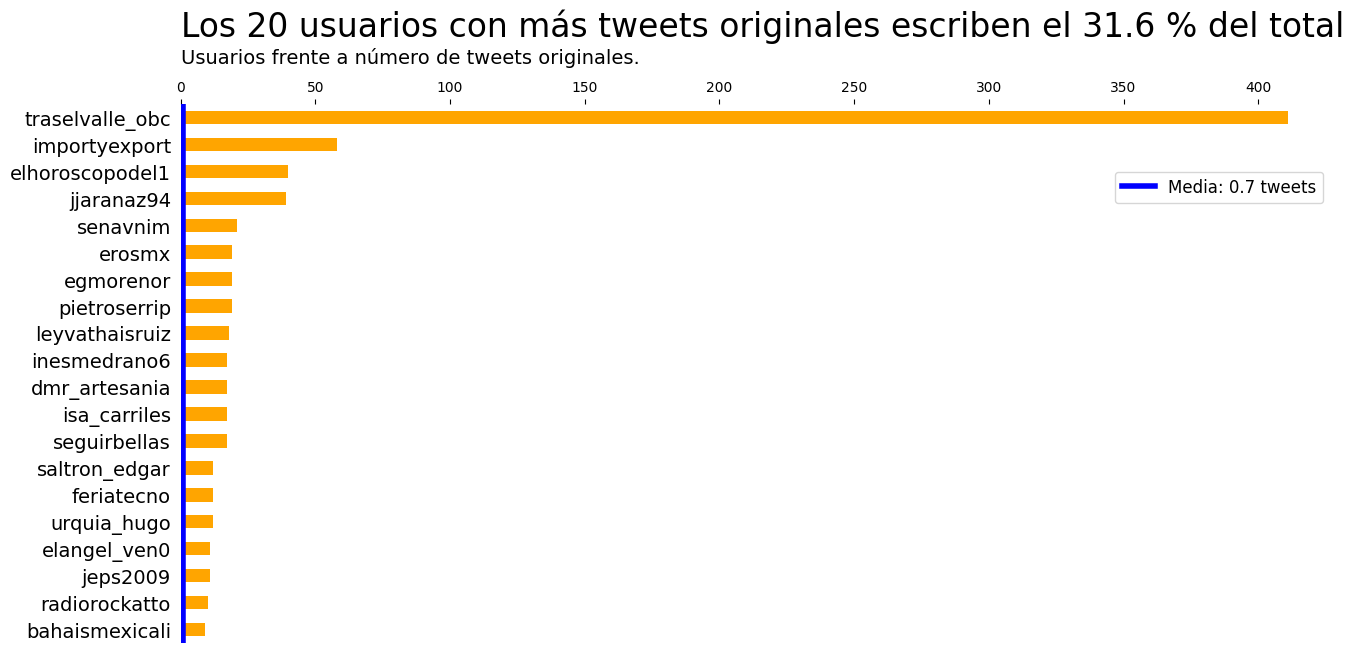

In [193]:
true_original_top20_sorted = volumen.sort_values(by=['tweets verdaderamente originales'],ascending=True).tail(20)

ax = true_original_top20_sorted.plot.barh(x='author',y='tweets verdaderamente originales',figsize=(15,7),color='orange',label='',fontsize=14)
ax.spines[['top','bottom','left','right']].set_visible(False)
plt.tick_params(axis='x',which='both',bottom=False,top=True,labelbottom=False,labeltop=True)
plt.tick_params(axis='y',which='both',left=False,right=False)
plt.xlabel('',fontsize=14)
plt.ylabel('')
plt.text(0,22,'Los 20 usuarios con más tweets originales escriben el {} % del total'.format(true_original_top20_percentage),
         fontsize=23.8)
plt.text(0,21,'Usuarios frente a número de tweets originales.',fontsize=14)
plt.axvline(x=true_original_mean,color='blue',linewidth=4,label='Media: {} tweets'.format(true_original_mean))
plt.legend(bbox_to_anchor=(0.99,0.89),prop={'size': 12})
plt.savefig('6.1. originales.jpg',bbox_inches='tight',dpi=50)

### Aportaciones (tweets + RTs)

In [194]:
aportaciones_top20 = volumen.sort_values(by=['total'],ascending=False).head(20)
aportaciones_top20.head()

,author,retweets recibidos,retweets realizados,tweets originales,total,tweets verdaderamente originales,tweets copypaste
1386,traselvalle_obc,284,451,2,453,411,-409
1328,importyexport,0,0,76,76,58,18
1312,jjaranaz94,232,44,0,44,39,-39
9,elhoroscopodel1,22,0,40,40,40,0
2167,tesoromoctezuma,2,0,28,28,2,26


In [195]:
# Hacer int si acaba en ".0" para dejar un número redondo.
porcentaje_aportaciones_top20 = (aportaciones_top20['total'].sum()/volumen['total'].sum()*100).round(1)
porcentaje_aportaciones_top20

16.0

In [196]:
mean_aportaciones = round(volumen['total'].mean(),1)
mean_aportaciones 

1.6

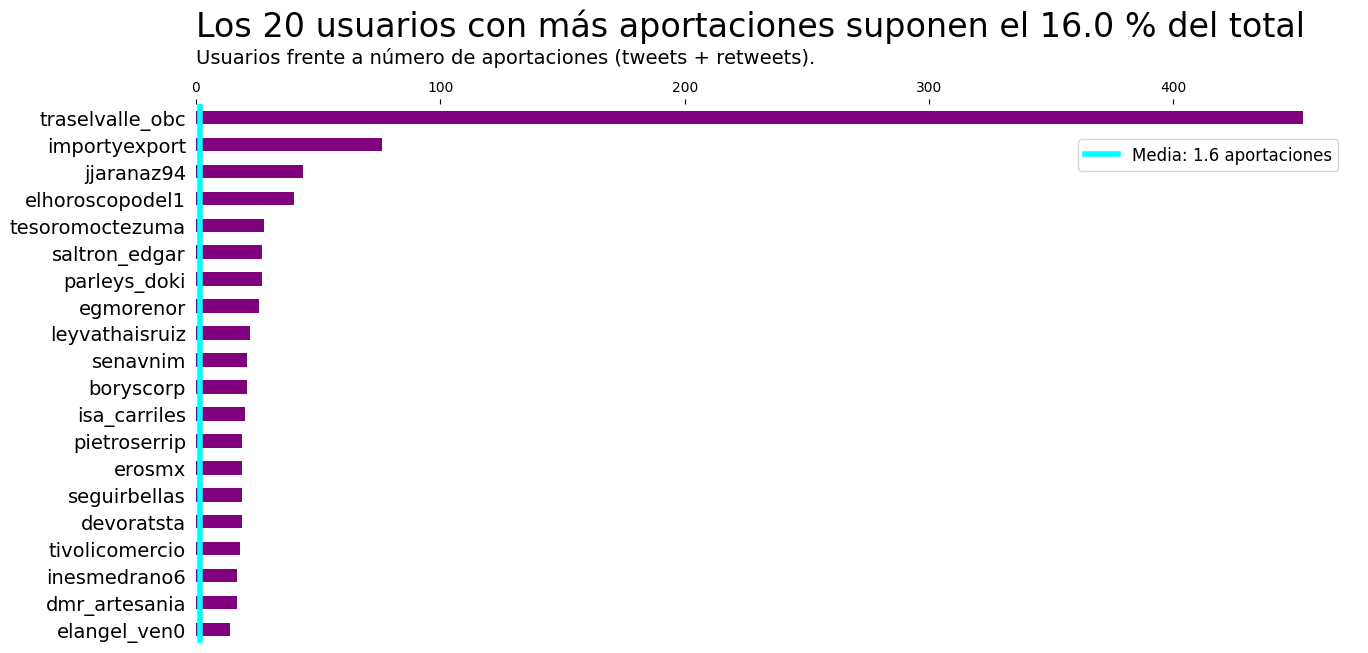

In [197]:
aportaciones_top20_sorted = volumen.sort_values(by=['total'],ascending=True).tail(20)

ax = aportaciones_top20_sorted.plot.barh(x='author',y='total',figsize=(15,7),color='purple',label='',fontsize=14)
ax.spines[['top','bottom','left','right']].set_visible(False)
plt.tick_params(axis='x',which='both',bottom=False,top=True,labelbottom=False,labeltop=True)
plt.tick_params(axis='y',which='both',left=False,right=False)
plt.xlabel('',fontsize=14)
plt.ylabel('')
plt.text(0,22,'Los 20 usuarios con más aportaciones suponen el {} % del total'.format(porcentaje_aportaciones_top20),
         fontsize=24)
plt.text(0,21,'Usuarios frente a número de aportaciones (tweets + retweets).',fontsize=14)
plt.axvline(x=mean_aportaciones,color='cyan',linewidth=4,label='Media: {} aportaciones'.format(mean_aportaciones))
plt.legend(bbox_to_anchor=(0.99,0.95),prop={'size': 12})
plt.savefig('6.2 aportaciones.jpg',bbox_inches='tight',dpi=50)

### Influencia (medida con los retweets recibidos) 

In [198]:
influencia_top20 = volumen.sort_values(by=['retweets recibidos'],ascending=False).head(20)
influencia_top20.head()

,author,retweets recibidos,retweets realizados,tweets originales,total,tweets verdaderamente originales,tweets copypaste
1,egmorenor,447,0,26,26,19,7
1386,traselvalle_obc,284,451,2,453,411,-409
253,yosoysexmex,265,0,3,3,3,0
1312,jjaranaz94,232,44,0,44,39,-39
1452,angeiherca,117,1,7,8,8,-1


In [199]:
porcentaje_influencia_top20 = (influencia_top20['retweets recibidos'].sum()/volumen['retweets recibidos'].sum()*100).round(1)
porcentaje_influencia_top20

63.9

In [200]:
mean_rts_received = round(volumen['retweets recibidos'].mean(),1)
mean_rts_received

0.9

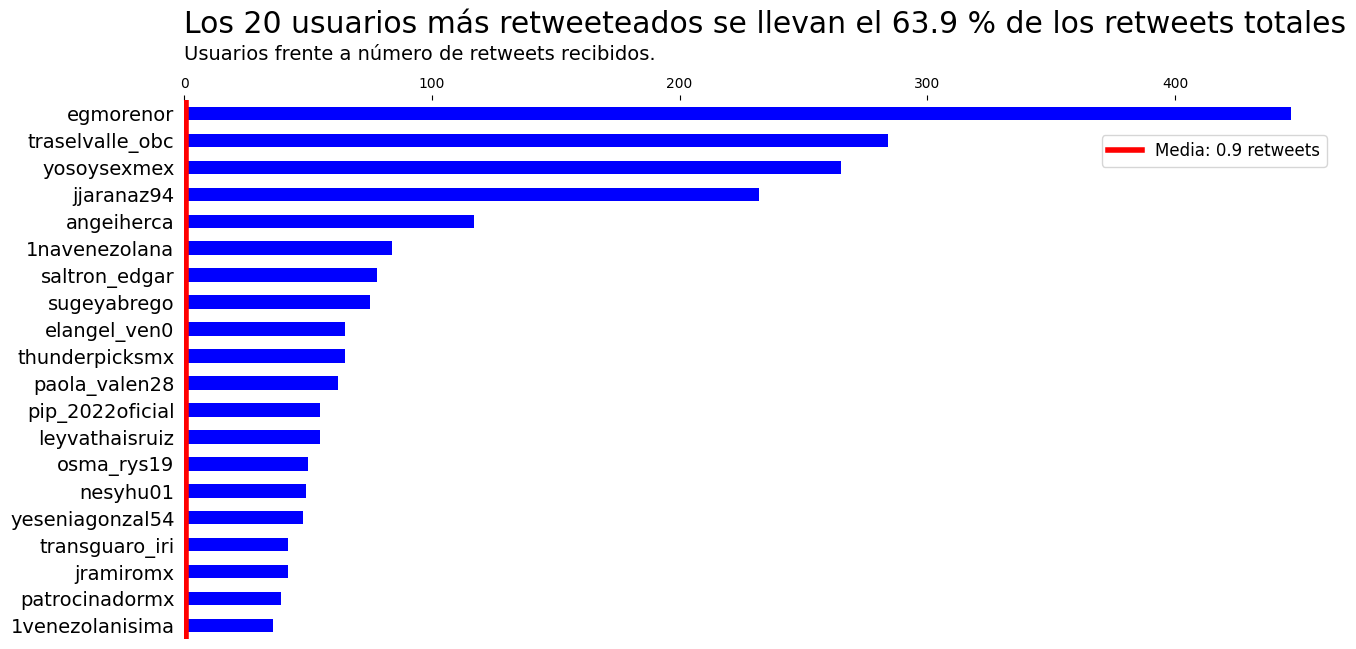

In [201]:
influencia_top20_sorted = volumen.sort_values(by=['retweets recibidos'],ascending=True).tail(20)

ax = influencia_top20_sorted.plot.barh(x='author',y='retweets recibidos',figsize=(15,7),color='blue',label='',fontsize=14)

ax.spines[['top','bottom','left','right']].set_visible(False)
plt.tick_params(axis='x',which='both',bottom=False,top=True,labelbottom=False,labeltop=True)
plt.tick_params(axis='y',which='both',left=False,right=False)
plt.xlabel('',fontsize=14)
plt.ylabel('')
plt.text(0,22,'Los 20 usuarios más retweeteados se llevan el {} % de los retweets totales'.format(porcentaje_influencia_top20),
         fontsize=21.5)
plt.text(0,21, 'Usuarios frente a número de retweets recibidos.',fontsize=14)
plt.axvline(x=mean_rts_received,color='red',linewidth=4,label='Media: {} retweets'.format(mean_rts_received))
plt.legend(bbox_to_anchor=(0.99,0.95),prop={'size': 12})
plt.savefig('6.3 retweeteados.jpg',bbox_inches='tight',dpi=50)

### Retweets realizados

In [202]:
retweets_made_top20 = volumen.sort_values(by=['retweets realizados'],ascending=False).head(20)
retweets_made_top20.head()

,author,retweets recibidos,retweets realizados,tweets originales,total,tweets verdaderamente originales,tweets copypaste
1386,traselvalle_obc,284,451,2,453,411,-409
1312,jjaranaz94,232,44,0,44,39,-39
302,isa_carriles,0,20,0,20,17,-17
3008,inesmedrano6,0,17,0,17,17,-17
1398,leyvathaisruiz,55,12,10,22,18,-8


In [203]:
porcentaje_rts_made_top20 = (retweets_made_top20['retweets realizados'].sum()/volumen['retweets realizados'].sum()*100).round(1)
porcentaje_rts_made_top20

14.2

In [204]:
mean_rts_made = round(volumen['retweets realizados'].mean(),1)
mean_rts_made

1.3

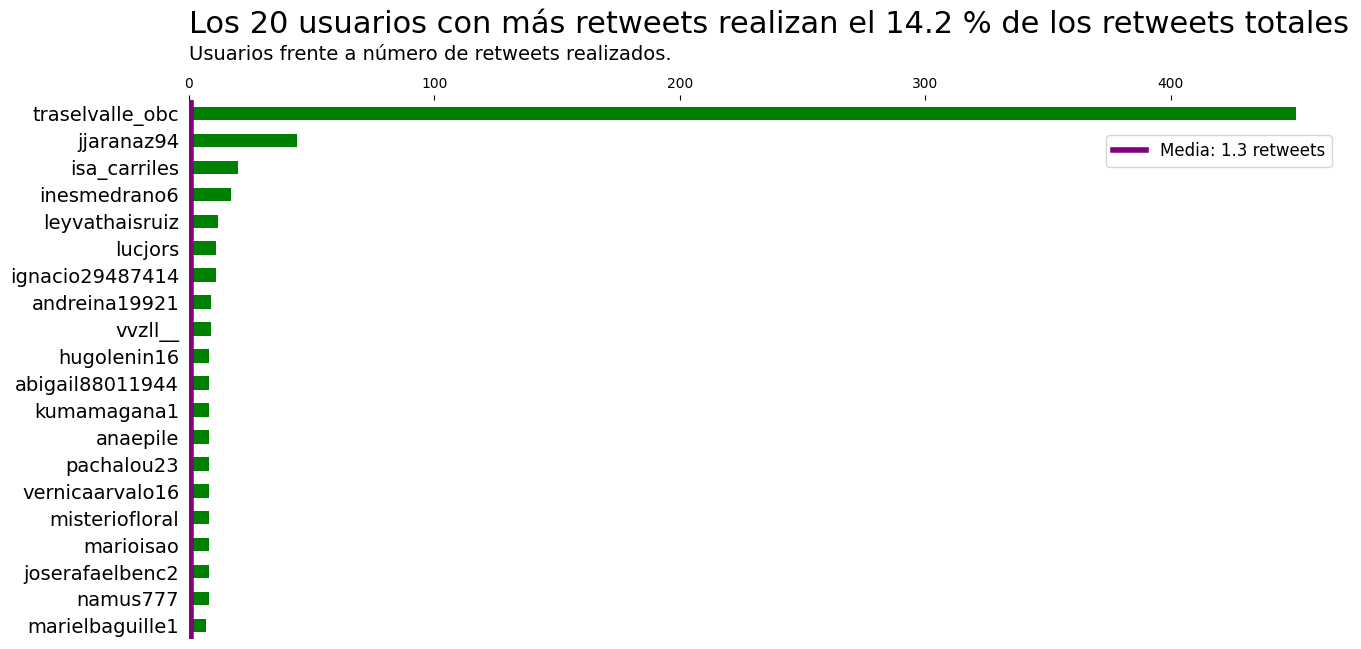

In [205]:
retweets_made_top20_sorted = volumen.sort_values(by=['retweets realizados'],ascending=True).tail(20)

ax = retweets_made_top20_sorted.plot.barh(x='author',y='retweets realizados',figsize=(15,7),color='green',label='',fontsize=14)
ax.spines[['top','bottom','left','right']].set_visible(False)
plt.tick_params(axis='x',which='both',bottom=False,top=True,labelbottom=False,labeltop=True)
plt.tick_params(axis='y',which='both',left=False,right=False)
plt.xlabel('',fontsize=14)
plt.ylabel('')
plt.text(0,22,'Los 20 usuarios con más retweets realizan el {} % de los retweets totales'.format(porcentaje_rts_made_top20),
         fontsize=22)
plt.text(0,21,'Usuarios frente a número de retweets realizados.',fontsize=14)
plt.axvline(x=mean_rts_received,color='purple',linewidth=4,label='Media: {} retweets'.format(mean_rts_made))
plt.legend(bbox_to_anchor=(0.99,0.95),prop={'size': 12})
plt.savefig('6.4 rts hechos.jpg',bbox_inches='tight',dpi=50)

Representamos las 4 medidas con gráficos de tarta.

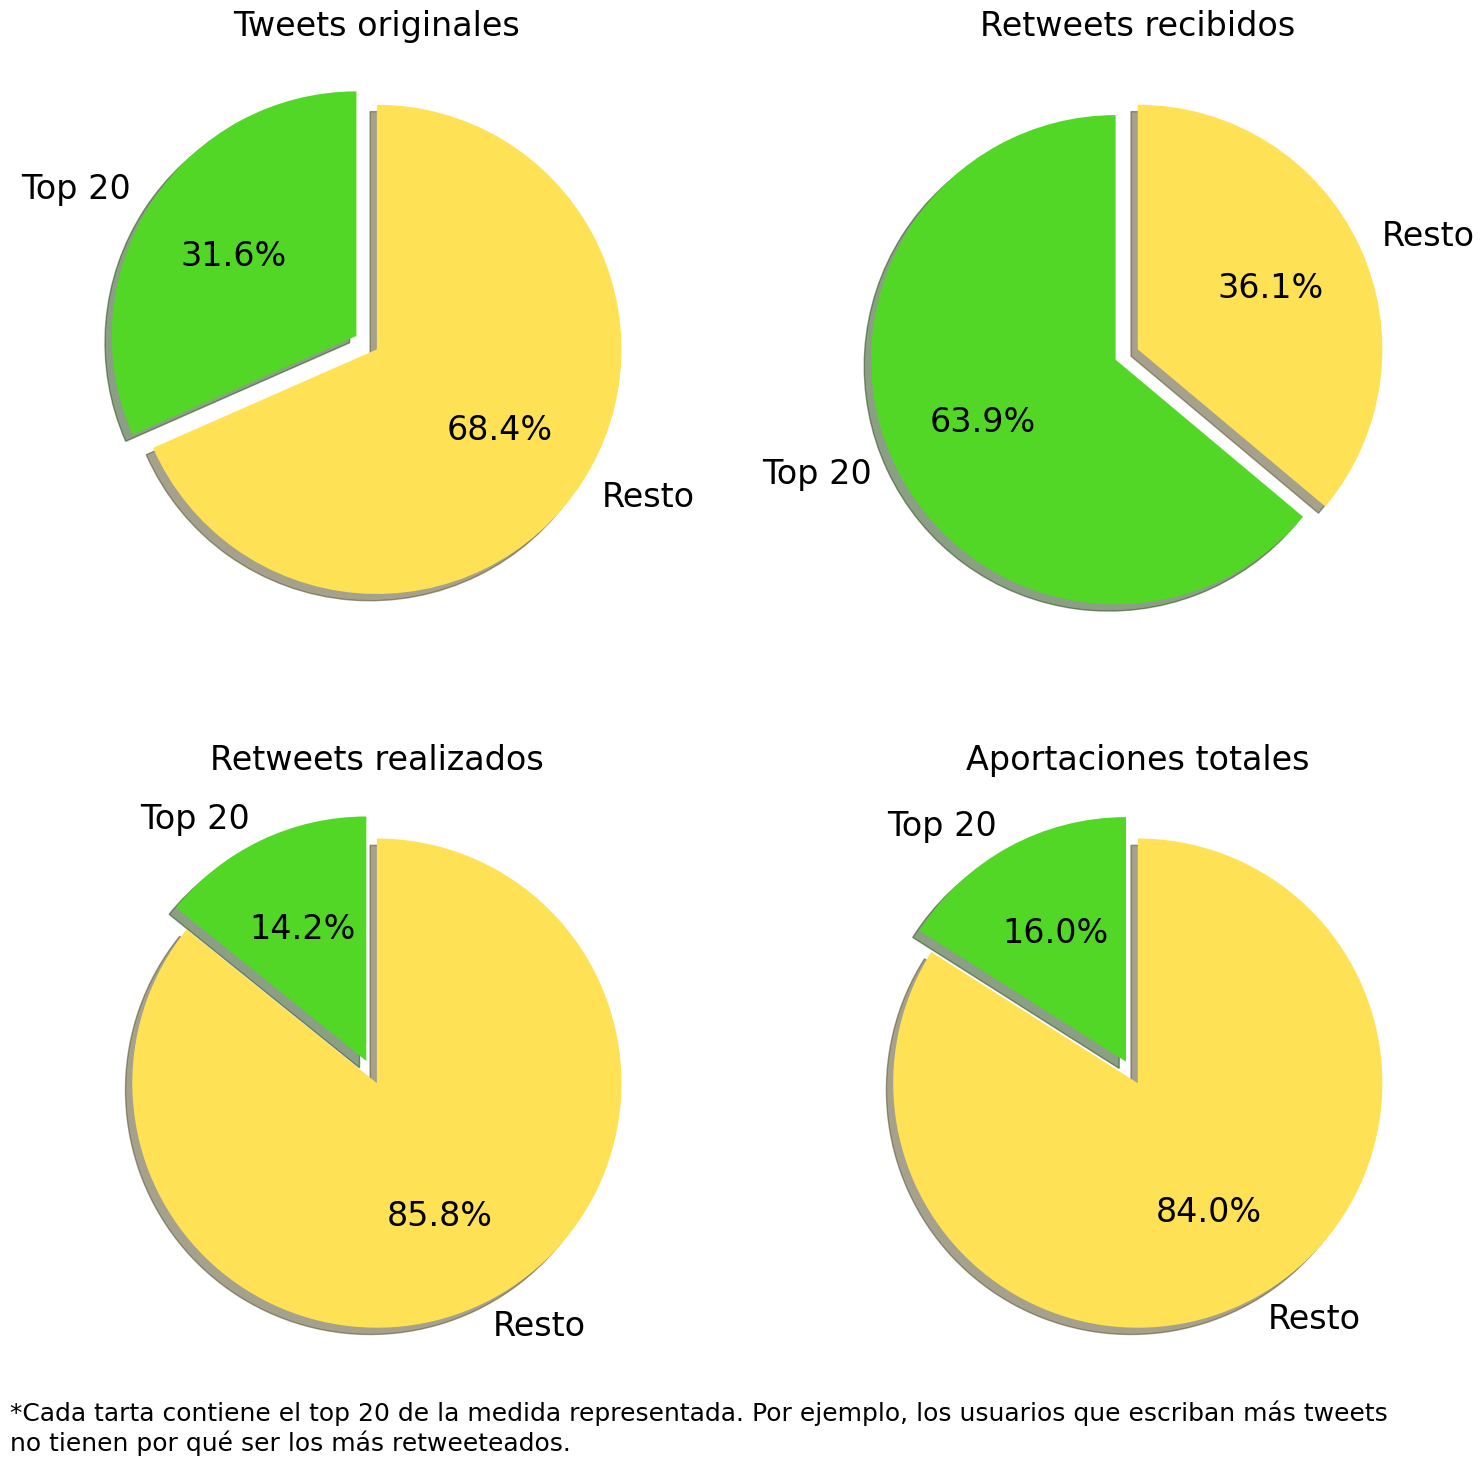

In [206]:
plt.figure(figsize=(18,27))
explode = (0.1, 0)
plt.subplot(3,2,1)
plt.pie([true_original_top20_percentage, 100-true_original_top20_percentage], explode=explode,
        labels=('Top 20', 'Resto'), autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 24,'color':"black"},
       colors = ['#52D726', '#FFE156'])
plt.title('Tweets originales',fontsize=24)
plt.text(-1.5,-4.5,'*Cada tarta contiene el top 20 de la medida representada. Por ejemplo, los usuarios que escriban más tweets\nno tienen por qué ser los más retweeteados.',
         fontsize=18)

plt.subplot(3, 2, 2)
plt.pie([porcentaje_influencia_top20, 100-porcentaje_influencia_top20], explode=explode,
        labels=('Top 20', 'Resto'), autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 24,'color':"black"},
       colors = ['#52D726', '#FFE156'])
plt.title('Retweets recibidos',fontsize=24)

plt.subplot(3, 2, 3)
plt.pie([porcentaje_rts_made_top20, 100-porcentaje_rts_made_top20], explode=explode,
        labels=('Top 20', 'Resto'), autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 24,'color':"black"},
       colors = ['#52D726', '#FFE156'])
plt.title('Retweets realizados',fontsize=24)

plt.subplot(3, 2, 4)
plt.pie([porcentaje_aportaciones_top20, 100-porcentaje_aportaciones_top20], explode=explode,
        labels=('Top 20', 'Resto'), autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 24,'color':"black"},
       colors = ['#52D726', '#FFE156'])
plt.title('Aportaciones totales',fontsize=24)

plt.savefig('6.5 todos juntos.jpg',bbox_inches='tight',dpi=50)

### Medida de esfuerzo inventada

En relación al número de tweets y retweets, podemos desarrollar una medida del esfuerzo que conlleva escribir un tweet original. Esto es diferente para cada hashtag, pues es más difícil escribir en un hashtag político que en #felizmartes, que es un hashtag donde cualquiera podría decir algo.

La medida de esfuerzo es el número de retweets dividido entre el número de tweets originales.

In [207]:
effort_variable = volumen['retweets realizados'].sum()/volumen['tweets verdaderamente originales'].sum()
effort_variable_rounded = effort_variable.round(1)
effort_variable_rounded

1.9

In [208]:
print('Hay {} retweets por cada tweet original.'.format(effort_variable_rounded))

Hay 1.9 retweets por cada tweet original.


Tomamos el top 5 de usuarios con más participaciones y calculamos su esfuerzo para comprobar si hacen más tweets originales o retweets.

In [209]:
volumen['esfuerzo'] = volumen['tweets verdaderamente originales']*effort_variable - volumen['retweets realizados']
volume_top_20 = volumen.sort_values(by=['total'], ascending=False).head(20)
volume_top_20.head()

,author,retweets recibidos,retweets realizados,tweets originales,total,tweets verdaderamente originales,tweets copypaste,esfuerzo
1386,traselvalle_obc,284,451,2,453,411,-409,328.204646
1328,importyexport,0,0,76,76,58,18,109.960753
1312,jjaranaz94,232,44,0,44,39,-39,29.939127
9,elhoroscopodel1,22,0,40,40,40,0,75.835002
2167,tesoromoctezuma,2,0,28,28,2,26,3.791750


De nuevo cuidado aquí con las coordenadas (plt.text(x,y), etc.)

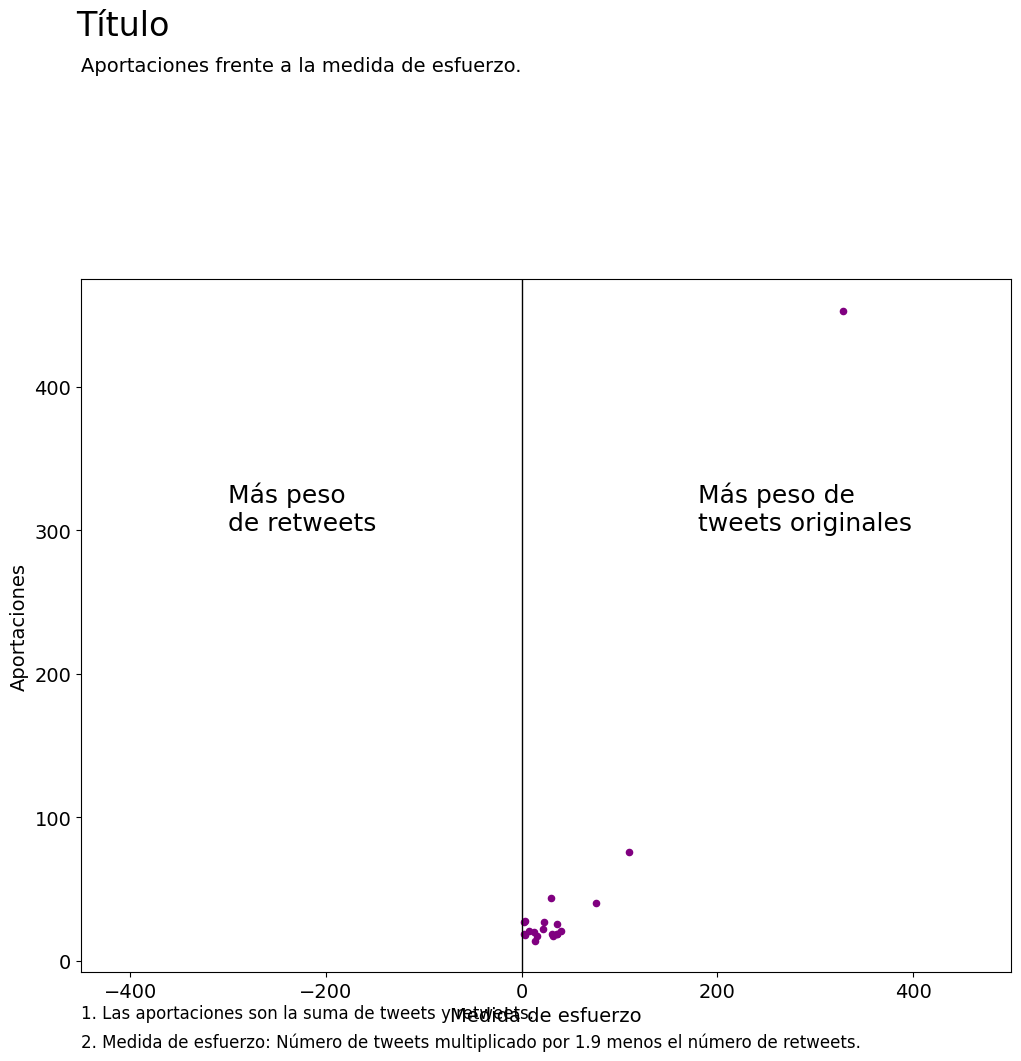

In [210]:
ax = volume_top_20.plot.scatter(x='esfuerzo',y='total',figsize=(12,9),fontsize=14,color='purple')
plt.xlabel('Medida de esfuerzo',fontsize=14)
plt.ylabel('Aportaciones',fontsize=14)
plt.text(-455,645,'Título',fontsize=24)
plt.text(-450,620,'Aportaciones frente a la medida de esfuerzo.',fontsize=14)
plt.text(-450,-40,'1. Las aportaciones son la suma de tweets y retweets.',fontsize=12)
plt.text(-450,-60,'2. Medida de esfuerzo: Número de tweets multiplicado por {} menos el número de retweets.'.format(effort_variable_rounded),
         fontsize=12)
plt.axvline(x=0,color='black',linewidth=1)
plt.xlim(-450,500)
plt.text(-300,300,'Más peso\nde retweets',fontsize=18)
plt.text(180,300,'Más peso de\ntweets originales',fontsize=18)
plt.savefig('8. medida de esfuerzo.jpg',bbox_inches='tight',dpi=100)

### Porcentaje de tweets originales contra porcentaje de retweets.

In [211]:
original_percentage = (volumen['tweets verdaderamente originales'].sum()/volumen['total'].sum()*100).round(1)
rt_percentage = ((volumen['retweets realizados'].sum()+copied_tweets)/volumen['total'].sum()*100).round(1)
print(original_percentage,rt_percentage)

42.3 57.7


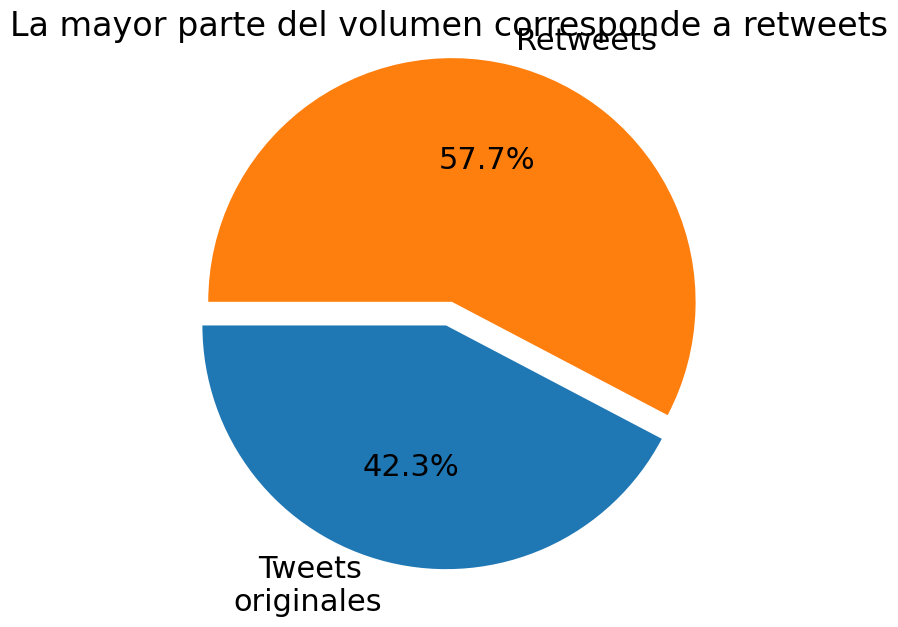

In [212]:
labels = 'Tweets  \noriginales', 'Retweets'
sizes = [original_percentage, rt_percentage]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=180, textprops={'fontsize': 22})
ax1.axis('equal')
plt.title('La mayor parte del volumen corresponde a retweets',fontsize=24)
plt.savefig('9.porcentaje de tweets y retweets.jpg',bbox_inches='tight',dpi=50)

## Buscar palabras

Vamos a filtrar el pico por los tweets que contengan ciertas palabras.

In [213]:
lista_palabras = ['amor','viernes','amigo','dias','buenos']

In [214]:
ht_palabra = ht_pico[ht_pico['text'].str.contains('|'.join(lista_palabras))]
ht_palabra = ht_palabra[['id tweet','author','text']]
ht_palabra = ht_palabra.drop_duplicates(subset='text',keep='first')
ht_palabra = ht_palabra[~ht_palabra['text'].str.startswith('rt @')]
print('Hay',len(ht_palabra),'con las palabras seleccionadas.')
ht_palabra.head(10)

Hay 74 con las palabras seleccionadas.


,id tweet,author,text
53,1592936956903575553,elhoroscopodel1,#felizmiércoles #virgo ♍ #horóscoposemanal #amor ❤ lee más 👀👇👇 https://t.co/vdxljff1cc
88,1592937428289220608,urquia_hugo,"@incubusita hola 👋 mí ❤️ ! el amor se trata de ti, de mí, de todos nosotros, de éste sentir que nos abraza y nos llena de felicidad. el amor es colectivo. el tiempo se detiene, cuando dos almas se abrazan con la mirada. #felizmiércoles 😉"
98,1592937525924212736,urquia_hugo,"@anabel74667603 hola 👋 mí ❤️ ! el amor se trata de ti, de mí, de todos nosotros, de éste sentir que nos abraza y nos llena de felicidad. el amor es colectivo. el tiempo se detiene, cuando dos almas se abrazan con la mirada. #felizmiércoles 😉"
105,1592937570891337728,urquia_hugo,"@sexyflabia hola 👋 mí ❤️ ! el amor se trata de ti, de mí, de todos nosotros, de éste sentir que nos abraza y nos llena de felicidad. el amor es colectivo. el tiempo se detiene, cuando dos almas se abrazan con la mirada. #felizmiércoles 😉"
124,1592937776349319168,urquia_hugo,"@nildapetit hola 👋 mí ❤️ ! el amor se trata de ti, de mí, de todos nosotros, de éste sentir que nos abraza y nos llena de felicidad. el amor es colectivo. el tiempo se detiene, cuando dos almas se abrazan con la mirada. #felizmiércoles 😉"
153,1592937992792182784,urquia_hugo,"@sandrag_74 hola 👋 mí ❤️ ! el amor se trata de ti, de mí, de todos nosotros, de éste sentir que nos abraza y nos llena de felicidad. el amor es colectivo. el tiempo se detiene, cuando dos almas se abrazan con la mirada. #felizmiércoles 😉"
155,1592938044428267522,urquia_hugo,"@pcanchera hola 👋 mí ❤️ ! el amor se trata de ti, de mí, de todos nosotros, de éste sentir que nos abraza y nos llena de felicidad. el amor es colectivo. el tiempo se detiene, cuando dos almas se abrazan con la mirada. #felizmiércoles 😉"
167,1592938103727357952,conectatecmx,¡buenos días! 🤩☕ #felizmiércoles no olvides seguir la cobertura de @incmty en https://t.co/nfrsk8pmil 📲💻 https://t.co/twlaydmbbr
256,1592939304581419009,adrycoach,"1/2 ¿cómo saber cuando es ahí o cuando no lo es? primero tienes que ser capaz de separar lo que sientes por alguien, de lo que esa persona te hace sentir. ya que son cosas muy diferentes. #felizmiercoles #amor #pareja #novio #novia #emociones #crush https://t.co/oamanbf1zc"
289,1592939787878793216,erosmx,@mario_dico50 @claudiashein @partidomorenamx q bien organizados están no crees ? 🤣🤣🤣tengan para q aprendan 🤣🤣#oposicioncagada #grammys #felizmiércoles
